# Tutorial for Gaussian Process Dataset Generator

Support methods

1. `gaussian` custom domain, single dirichlet boundary condition, support dynamic boundary condition
2. `gaussian_square` rectangel domain, can customize four boundary conditions, support dynamic boundary condition

In [1]:
# Packages
import sys; sys.path.append('../../')
import matplotlib.pyplot as plt 
from fenics import *
from dolfin import *
from mshr import *
from dgl.data.utils import load_graphs
from src.gaussian import gaussian, gaussian_square
from src.utils.plot import plot_graph, gif_generator

Using backend: pytorch


## Method `gaussian`

The basic method can allow us to use any shape of mesh. We can generate meshed by easily following [FEniCS build in mesh](https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/built-in_meshes/python/documentation.html) or using `generate_mesh` function. [Here](https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/mesh-generation/python/documentation.html) is the basic tutorial.  

Howerer, by this method we can only set one single boundary constrain function, it can be constant or function, but will work on every boundary. This means in this method we can not control each boundary separatly. 

First example is the gaussian equation on square $[-2, 2]\times[-2, 2]$ from $t=0$ to $t=1$, with boundary condition to static $0$. And the init condition to $e^{-x^2-y^2}$, i.e.

$$u'=\bigtriangleup(u)+f, x\in D, t\in(0, 2]$$
$$u=u_D=0, x\in \partial D, t\in(0, 2]$$
$$u=u_0=e^{-x^2-y^2}, x\in D, t=0$$

Running possion will generate a binary data file, which is the generated dgl graph. The graph has features

- Node feature `x`: x coordinates for nodes in graph
- Node feature `y`: y coordinates for nodes in graph
- Node feature `value`: values for nodes

Future work will add more features for node and edge.

In [2]:
# Stop time 
stop = 2

# Time steps
steps = 50

# Create mesh
mesh = RectangleMesh(p0=Point(-2, -2), p1=Point(2, 2), nx=8, ny=8)

# Set function f
f = '0'

# Choose boundary condition
ud = '0'

# Choose init condition
u0 = 'exp(-1*pow(x[0],2)-1*pow(x[1],2))'

# Generate
gaussian(stop=stop, 
         steps=steps, 
         mesh=mesh, 
         f=f,
         u0=u0,
         ud=ud, 
         path='../data/gaussian_square.bin')

/home/botu/.local/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


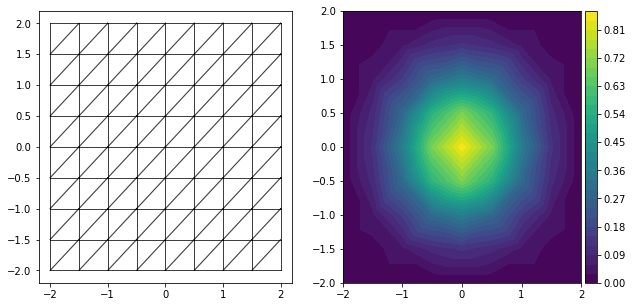

In [3]:
# Load graph
'''
Warning: the save_graph function in dgl will save graphs in a 2 dim list, in this example case, the index of first generated graph should be [0, 0], the rest 49 graphs should be [0, 1:50]
'''
graph = load_graphs('../data/gaussian_square.bin')
plot_graph(graph[0][0])

In [ ]:
# Save every time step's graph to figure
for i in range(50):
    plot_graph(graph[0][i])
    plt.savefig('../fig/gaussian_square/' + str(i) + '.png')

In [ ]:
# Generate gif for the process
gif_generator('../fig/gaussian_square/', '../fig/gaussian_square.gif')


# Method `gaussian_square`

This method is for rectangle domain. In the meanwhile, this method support separatly control boundary conditions for four boundaries, i.e. top, bottom, left and right. For more detail please refer to function comment. 

Example here is on the square $[-2, 2]\times[-2, 2]$ will set the top boundary with $sin(t)$, rest boundaries are set to constant $0$.

In [ ]:
gaussian_square(x0=-2, 
                xn=2,
                y0=-2,
                yn=2,
                stop=10,
                steps=50,
                f='0',
                ud_top='sin(t)',
                ud_bottom='0',
                ud_left='0',
                ud_right='0',
                u0='0',
                cell_size=5,
                tol=1e-2,
                dy=True,
                path='data/gaussian_suqare_dynamic.bin'
                )

tensor(0.0332, dtype=torch.float64)


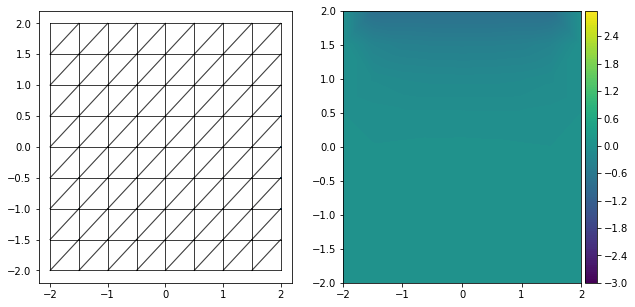

In [38]:
graph = load_graphs('../data/gaussian_square_dynamic.bin')
plot_graph(graph[0][25])


In [ ]:
# Save every time step's graph to figure
for i in range(50):
    plot_graph(graph[0][i])
    plt.savefig('../fig/gaussian_square_dynamic/' + str(i) + '.png')

In [ ]:
# Generate gif for the process
gif_generator('../fig/gaussian_square_dynamic/', '../fig/gaussian_square_dynamic.gif')